In [102]:
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Notebook customizations
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1

### Properties data prep

In [103]:
properties_df = pd.read_csv("./housingWebScraper/housingWebScraper/output/Property-lastrun.csv", sep="|", dtype={'zip_code': str}, encoding="latin1")
properties_df

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,145 Como Park Blvd,600,NaN,1950.0,Cheektowaga,NaN,NaN,"4,890 sqft",1.0,2.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/cheektowaga/145-como-park-blvd-cheektowaga-ny-14227--2158517535,NY,"$2,773.65",2017,14227
1,192 Peekamoose Rd,NaN,NaN,NaN,Sundown,NaN,NaN,2.1 acres,NaN,NaN,NaN,NaN,NaN,Income/Investment,https://www.trulia.com/p/ny/sundown/192-peekamoose-rd-sundown-ny-12740--2011727501,NY,$701.24,2017,12740
2,130 Winter Park Rd,"1,984",NaN,1978.0,Southington,NaN,NaN,0.52 acres,1.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/130-winter-park-rd-southington-ct-06489--2005300886,CT,"$6,073.00",2018,06489
3,120 Winter Park Rd,"1,184",NaN,1978.0,Southington,NaN,NaN,0.5 acres,1.0,4.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/120-winter-park-rd-southington-ct-06489--2005300291,CT,"$5,032.00",2018,06489
4,11 Winter Park Rd,"1,452",NaN,1966.0,Southington,NaN,NaN,0.57 acres,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/11-winter-park-rd-southington-ct-06489--2005300224,CT,"$4,959.00",2018,06489
5,48 Winter Wood Rd,"1,884",NaN,1984.0,Southington,NaN,NaN,1 acre,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/48-winter-wood-rd-southington-ct-06489--2005308335,CT,"$6,942.00",2018,06489
6,18 Winter Wood Rd,"3,220",NaN,1979.0,Southington,NaN,NaN,1 acre,2.5,NaN,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/18-winter-wood-rd-southington-ct-06489--2005303122,CT,"$8,722.00",2018,06489
7,192 Water St,"1,656",NaN,1900.0,Southington,NaN,NaN,0.29 acres,2.0,4.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ct/southington/192-water-st-southington-ct-06489--2005303183,CT,"$4,207.00",2018,06489
8,172 Water St,"1,500",NaN,1900.0,Southington,NaN,NaN,0.43 acres,2.0,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/172-water-st-southington-ct-06489--2005302545,CT,"$3,794.00",2018,06489
9,38 Winter Wood Rd,"2,120",NaN,1984.0,Southington,NaN,NaN,1.24 acres,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/38-winter-wood-rd-southington-ct-06489--2005307093,CT,"$7,195.00",2018,06489


In [104]:
properties_df.tax_year.value_counts()

2017            18199
2018            3945 
3 Beds Price    4    
2 Beds Price    2    
2 Beds          1    
4 Beds Price    1    
Name: tax_year, dtype: int64

#### Need to update the crawler to account for these anomalies of these improperly parsed records 
#### It is actually not the crawler's fault since these records come from a different page design for which the crawler support isn't added yet,  but we need to ensure such pages get ignored in the first place

In [105]:
properties_df.loc[properties_df['tax_year'] == '3 Beds Price']

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
2349,NaN,910,NaN,1956.0,NaN,NaN,NaN,5227 sqft,1.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/cheektowaga/34-wheaton-dr-cheektowaga-ny-14225--2013029668,NaN,910 sqft,3 Beds Price,NaN
2555,NaN,"1,997",NaN,1964.0,NaN,NaN,NaN,0.60 acres,3.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ct/southington/214-woodruff-st-southington-ct-06489--2005303908,NaN,"1,997 sqft",3 Beds Price,NaN
15677,NaN,"1,486",NaN,1945.0,NaN,NaN,NaN,6904 sqft,2.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/cheektowaga/492-lamarck-dr-cheektowaga-ny-14225--2013031760,NaN,"1,486 sqft",3 Beds Price,NaN
22241,NaN,"1,044",NaN,1950.0,NaN,NaN,NaN,4599 sqft,1.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/buffalo/92-zimmerman-blvd-buffalo-ny-14223--2013006377,NaN,"1,044 sqft",3 Beds Price,NaN


In [106]:
properties_df[properties_df['tax_amount'].str.contains("sqft", na=False)]

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
2349,NaN,910,NaN,1956.0,NaN,NaN,NaN,5227 sqft,1.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/cheektowaga/34-wheaton-dr-cheektowaga-ny-14225--2013029668,NaN,910 sqft,3 Beds Price,NaN
2555,NaN,"1,997",NaN,1964.0,NaN,NaN,NaN,0.60 acres,3.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ct/southington/214-woodruff-st-southington-ct-06489--2005303908,NaN,"1,997 sqft",3 Beds Price,NaN
13006,NaN,"1,274",NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,https://www.trulia.com/property/3259579654-19-Riverside-Dr-Southington-CT-06489?rd=1,NaN,$133/sqft,2 Beds Price,NaN
14146,NaN,"1,544",NaN,1989.0,NaN,NaN,NaN,1555 sqft,2.0,2.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/west-seneca/54-hillcrest-hts-west-seneca-ny-14224--2013018412,NaN,"1,544 sqft",2 Beds,NaN
15677,NaN,"1,486",NaN,1945.0,NaN,NaN,NaN,6904 sqft,2.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/cheektowaga/492-lamarck-dr-cheektowaga-ny-14225--2013031760,NaN,"1,486 sqft",3 Beds Price,NaN
16262,NaN,968,NaN,1968.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/amherst/18-thomas-jefferson-ln-u-amherst-ny-14226--2013038524,NaN,$124/sqft,2 Beds Price,NaN
16279,NaN,"1,576",NaN,1936.0,NaN,NaN,NaN,5227 sqft,2.0,4.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/amherst/24-university-ct-amherst-ny-14226--2013039787,NaN,"1,576 sqft",4 Beds Price,NaN
22241,NaN,"1,044",NaN,1950.0,NaN,NaN,NaN,4599 sqft,1.0,3.0,NaN,NaN,NaN,NaN,https://www.trulia.com/p/ny/buffalo/92-zimmerman-blvd-buffalo-ny-14223--2013006377,NaN,"1,044 sqft",3 Beds Price,NaN


#### Remove anomalous records

In [107]:
properties_df = properties_df[~properties_df['tax_year'].str.contains('Beds', na=False)]
properties_df

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,145 Como Park Blvd,600,NaN,1950.0,Cheektowaga,NaN,NaN,"4,890 sqft",1.0,2.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/cheektowaga/145-como-park-blvd-cheektowaga-ny-14227--2158517535,NY,"$2,773.65",2017,14227
1,192 Peekamoose Rd,NaN,NaN,NaN,Sundown,NaN,NaN,2.1 acres,NaN,NaN,NaN,NaN,NaN,Income/Investment,https://www.trulia.com/p/ny/sundown/192-peekamoose-rd-sundown-ny-12740--2011727501,NY,$701.24,2017,12740
2,130 Winter Park Rd,"1,984",NaN,1978.0,Southington,NaN,NaN,0.52 acres,1.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/130-winter-park-rd-southington-ct-06489--2005300886,CT,"$6,073.00",2018,06489
3,120 Winter Park Rd,"1,184",NaN,1978.0,Southington,NaN,NaN,0.5 acres,1.0,4.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/120-winter-park-rd-southington-ct-06489--2005300291,CT,"$5,032.00",2018,06489
4,11 Winter Park Rd,"1,452",NaN,1966.0,Southington,NaN,NaN,0.57 acres,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/11-winter-park-rd-southington-ct-06489--2005300224,CT,"$4,959.00",2018,06489
5,48 Winter Wood Rd,"1,884",NaN,1984.0,Southington,NaN,NaN,1 acre,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/48-winter-wood-rd-southington-ct-06489--2005308335,CT,"$6,942.00",2018,06489
6,18 Winter Wood Rd,"3,220",NaN,1979.0,Southington,NaN,NaN,1 acre,2.5,NaN,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/18-winter-wood-rd-southington-ct-06489--2005303122,CT,"$8,722.00",2018,06489
7,192 Water St,"1,656",NaN,1900.0,Southington,NaN,NaN,0.29 acres,2.0,4.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ct/southington/192-water-st-southington-ct-06489--2005303183,CT,"$4,207.00",2018,06489
8,172 Water St,"1,500",NaN,1900.0,Southington,NaN,NaN,0.43 acres,2.0,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/172-water-st-southington-ct-06489--2005302545,CT,"$3,794.00",2018,06489
9,38 Winter Wood Rd,"2,120",NaN,1984.0,Southington,NaN,NaN,1.24 acres,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/38-winter-wood-rd-southington-ct-06489--2005307093,CT,"$7,195.00",2018,06489


In [108]:
properties_df.property_type.value_counts()

Single-Family Home     18444
Multi-Family           1930 
Mobile/Manufactured    979  
Lot/Land               968  
Condo                  592  
Townhouse              247  
Unknown                144  
Income/Investment      41   
Farm/Ranch             30   
Name: property_type, dtype: int64

In [109]:
properties_df.state.value_counts()

NY    19035
CT    4338 
Name: state, dtype: int64

#### Convert certain columns like area and currency from strings to number, and make them uniform

In [110]:
properties_df['area_sqft'] = properties_df['area_sqft'].str.replace(',', '').astype(float)
properties_df['tax_amount'] = properties_df['tax_amount'].str.replace(r'\$|,', '').astype(float)
properties_df

/Users/viveckh/Knowledgent/HousingPricePrediction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/viveckh/Knowledgent/HousingPricePrediction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,145 Como Park Blvd,600.0,NaN,1950.0,Cheektowaga,NaN,NaN,"4,890 sqft",1.0,2.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/cheektowaga/145-como-park-blvd-cheektowaga-ny-14227--2158517535,NY,2773.65,2017,14227
1,192 Peekamoose Rd,NaN,NaN,NaN,Sundown,NaN,NaN,2.1 acres,NaN,NaN,NaN,NaN,NaN,Income/Investment,https://www.trulia.com/p/ny/sundown/192-peekamoose-rd-sundown-ny-12740--2011727501,NY,701.24,2017,12740
2,130 Winter Park Rd,1984.0,NaN,1978.0,Southington,NaN,NaN,0.52 acres,1.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/130-winter-park-rd-southington-ct-06489--2005300886,CT,6073.00,2018,06489
3,120 Winter Park Rd,1184.0,NaN,1978.0,Southington,NaN,NaN,0.5 acres,1.0,4.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/120-winter-park-rd-southington-ct-06489--2005300291,CT,5032.00,2018,06489
4,11 Winter Park Rd,1452.0,NaN,1966.0,Southington,NaN,NaN,0.57 acres,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/11-winter-park-rd-southington-ct-06489--2005300224,CT,4959.00,2018,06489
5,48 Winter Wood Rd,1884.0,NaN,1984.0,Southington,NaN,NaN,1 acre,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/48-winter-wood-rd-southington-ct-06489--2005308335,CT,6942.00,2018,06489
6,18 Winter Wood Rd,3220.0,NaN,1979.0,Southington,NaN,NaN,1 acre,2.5,NaN,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/18-winter-wood-rd-southington-ct-06489--2005303122,CT,8722.00,2018,06489
7,192 Water St,1656.0,NaN,1900.0,Southington,NaN,NaN,0.29 acres,2.0,4.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ct/southington/192-water-st-southington-ct-06489--2005303183,CT,4207.00,2018,06489
8,172 Water St,1500.0,NaN,1900.0,Southington,NaN,NaN,0.43 acres,2.0,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/172-water-st-southington-ct-06489--2005302545,CT,3794.00,2018,06489
9,38 Winter Wood Rd,2120.0,NaN,1984.0,Southington,NaN,NaN,1.24 acres,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/38-winter-wood-rd-southington-ct-06489--2005307093,CT,7195.00,2018,06489


In [111]:
def make_area_uniform(row):
    '''
        Converts the areas in other units to sqft
    '''
    
    match = re.match(r"\s*(?P<area>[0-9,\.]+)\s+(?P<unit>[a-z]+)\s*$", str(row['lot_size']))
    if match is not None:
        area = match.group('area')
        unit = match.group('unit')
        area_in_float = float(area.replace(',', ''))
        if unit == 'acre' or unit == 'acres':
            row['lot_size'] = area_in_float * 43560
        elif unit == 'sqft':
            row['lot_size'] = area_in_float
        else:
            print("Unhandled unit for area - " + unit + ". Handle it in make_area_uniform function")
    else:
        if pd.notna(row['lot_size']):
            print("Unhandled value in make_area_uniform " + str(row['lot_size']))
    
    return row

properties_df = properties_df.apply(lambda row: make_area_uniform(row), axis=1)
properties_df

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,145 Como Park Blvd,600.0,NaN,1950.0,Cheektowaga,NaN,NaN,4890.0,1.0,2.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/cheektowaga/145-como-park-blvd-cheektowaga-ny-14227--2158517535,NY,2773.65,2017,14227
1,192 Peekamoose Rd,NaN,NaN,NaN,Sundown,NaN,NaN,91476.0,NaN,NaN,NaN,NaN,NaN,Income/Investment,https://www.trulia.com/p/ny/sundown/192-peekamoose-rd-sundown-ny-12740--2011727501,NY,701.24,2017,12740
2,130 Winter Park Rd,1984.0,NaN,1978.0,Southington,NaN,NaN,22651.2,1.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/130-winter-park-rd-southington-ct-06489--2005300886,CT,6073.00,2018,06489
3,120 Winter Park Rd,1184.0,NaN,1978.0,Southington,NaN,NaN,21780.0,1.0,4.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/120-winter-park-rd-southington-ct-06489--2005300291,CT,5032.00,2018,06489
4,11 Winter Park Rd,1452.0,NaN,1966.0,Southington,NaN,NaN,24829.2,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/11-winter-park-rd-southington-ct-06489--2005300224,CT,4959.00,2018,06489
5,48 Winter Wood Rd,1884.0,NaN,1984.0,Southington,NaN,NaN,43560.0,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/48-winter-wood-rd-southington-ct-06489--2005308335,CT,6942.00,2018,06489
6,18 Winter Wood Rd,3220.0,NaN,1979.0,Southington,NaN,NaN,43560.0,2.5,NaN,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/18-winter-wood-rd-southington-ct-06489--2005303122,CT,8722.00,2018,06489
7,192 Water St,1656.0,NaN,1900.0,Southington,NaN,NaN,12632.4,2.0,4.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ct/southington/192-water-st-southington-ct-06489--2005303183,CT,4207.00,2018,06489
8,172 Water St,1500.0,NaN,1900.0,Southington,NaN,NaN,18730.8,2.0,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/172-water-st-southington-ct-06489--2005302545,CT,3794.00,2018,06489
9,38 Winter Wood Rd,2120.0,NaN,1984.0,Southington,NaN,NaN,54014.4,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ct/southington/38-winter-wood-rd-southington-ct-06489--2005307093,CT,7195.00,2018,06489


### Transactions data prep

In [112]:
transactions_df = pd.read_csv("./housingWebScraper/housingWebScraper/output/Transaction-lastrun.csv", sep="|", encoding="latin1", parse_dates=['recording_date', 'contract_date'])
transactions_df

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type
0,2016-11-15,NaN,Deed,"$19,000",https://www.trulia.com/p/ny/sundown/192-peekamoose-rd-sundown-ny-12740--2011727501,2016-11-29,NaN,Purchase/Resale Arm's Length Residential Transaction
1,NaT,NaN,Warranty Deed,"$147,400",https://www.trulia.com/p/ct/southington/11-winter-park-rd-southington-ct-06489--2005300224,1993-07-09,NaN,Purchase/Resale Arm's Length Residential Transaction
2,NaT,NaN,Warranty Deed,"$156,000",https://www.trulia.com/p/ct/southington/192-water-st-southington-ct-06489--2005303183,2003-08-18,NaN,Purchase/Resale Arm's Length Residential Transaction
3,NaT,NaN,NaN,"$156,000",https://www.trulia.com/p/ct/southington/152-water-st-southington-ct-06489--2200862949,2016-11-09,NaN,NaN
4,NaT,NaN,REO Resale,"$91,500",https://www.trulia.com/p/ct/southington/152-water-st-southington-ct-06489--2200862949,2015-05-28,$29,Purchase/Resale Arm's Length Residential Transaction
5,NaT,NaN,Warranty Deed,"$135,000",https://www.trulia.com/p/ct/southington/152-water-st-southington-ct-06489--2200862949,2002-10-31,NaN,Purchase/Resale Arm's Length Residential Transaction
6,NaT,NaN,Warranty Deed,"$81,250",https://www.trulia.com/p/ct/southington/184-water-st-r-southington-ct-06489--2190984681,2005-02-28,NaN,Purchase/Resale Arm's Length Residential Transaction
7,2005-11-04,$24,Bargain and Sale Deed,"$6,000",https://www.trulia.com/p/ny/sundown/180-peekamoose-rd-sundown-ny-12740--2011727486,2005-11-07,NaN,Purchase/Resale Arm's Length Residential Transaction
8,NaT,NaN,Warranty Deed,"$109,950",https://www.trulia.com/p/ct/southington/142-water-st-southington-ct-06489--1003200019,2014-08-21,$33,Purchase/Resale Arm's Length Residential Transaction
9,NaT,NaN,Warranty Deed,"$300,000",https://www.trulia.com/p/ct/southington/92-water-st-southington-ct-06489--2005312295,2018-07-30,$38,Purchase/Resale Arm's Length Residential Transaction


In [113]:
transactions_df.transaction_type.value_counts()

Purchase/Resale Arm's Length Residential Transaction    15844
Insured Non-Residential Grant Deed                      957  
Non-Arm's Length Transaction                            678  
REO and Trustee Deed                                    320  
New Residential Construction Transaction                123  
Name: transaction_type, dtype: int64

In [114]:
transactions_df.document_type.value_counts()

Warranty Deed                                                                                                                    9315
Deed                                                                                                                             5270
Executor's Deed                                                                                                                  776 
Other                                                                                                                            754 
REO Resale                                                                                                                       521 
Land Contract                                                                                                                    378 
REO Repossession                                                                                                                 199 
Corporation Deed                                              

#### Lets format the currency fields

In [115]:
transactions_df['price'] = transactions_df['price'].str.replace(r'\$|,', '').astype(float)
transactions_df['county_transfer_tax'] = transactions_df['county_transfer_tax'].str.replace(r'\$|,', '').astype(float)
transactions_df['total_transfer_tax'] = transactions_df['total_transfer_tax'].str.replace(r'\$|,', '').astype(float)
transactions_df

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type
0,2016-11-15,NaN,Deed,19000.0,https://www.trulia.com/p/ny/sundown/192-peekamoose-rd-sundown-ny-12740--2011727501,2016-11-29,NaN,Purchase/Resale Arm's Length Residential Transaction
1,NaT,NaN,Warranty Deed,147400.0,https://www.trulia.com/p/ct/southington/11-winter-park-rd-southington-ct-06489--2005300224,1993-07-09,NaN,Purchase/Resale Arm's Length Residential Transaction
2,NaT,NaN,Warranty Deed,156000.0,https://www.trulia.com/p/ct/southington/192-water-st-southington-ct-06489--2005303183,2003-08-18,NaN,Purchase/Resale Arm's Length Residential Transaction
3,NaT,NaN,NaN,156000.0,https://www.trulia.com/p/ct/southington/152-water-st-southington-ct-06489--2200862949,2016-11-09,NaN,NaN
4,NaT,NaN,REO Resale,91500.0,https://www.trulia.com/p/ct/southington/152-water-st-southington-ct-06489--2200862949,2015-05-28,29.0,Purchase/Resale Arm's Length Residential Transaction
5,NaT,NaN,Warranty Deed,135000.0,https://www.trulia.com/p/ct/southington/152-water-st-southington-ct-06489--2200862949,2002-10-31,NaN,Purchase/Resale Arm's Length Residential Transaction
6,NaT,NaN,Warranty Deed,81250.0,https://www.trulia.com/p/ct/southington/184-water-st-r-southington-ct-06489--2190984681,2005-02-28,NaN,Purchase/Resale Arm's Length Residential Transaction
7,2005-11-04,24.0,Bargain and Sale Deed,6000.0,https://www.trulia.com/p/ny/sundown/180-peekamoose-rd-sundown-ny-12740--2011727486,2005-11-07,NaN,Purchase/Resale Arm's Length Residential Transaction
8,NaT,NaN,Warranty Deed,109950.0,https://www.trulia.com/p/ct/southington/142-water-st-southington-ct-06489--1003200019,2014-08-21,33.0,Purchase/Resale Arm's Length Residential Transaction
9,NaT,NaN,Warranty Deed,300000.0,https://www.trulia.com/p/ct/southington/92-water-st-southington-ct-06489--2005312295,2018-07-30,38.0,Purchase/Resale Arm's Length Residential Transaction


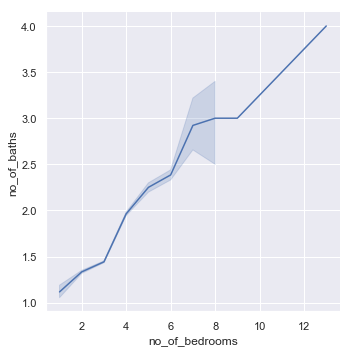

In [116]:
sns.relplot(kind="line", x='no_of_bedrooms', y='no_of_baths', data=properties_df)

In [117]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119
